In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100# データ点の個数
np.random.seed(0)# データ点のために乱数列を固定
X = np.random.randn(N, 2)# ランダムな N×2 行列を生成 = 2次元空間上のランダムな点 N 個

In [3]:
def f(x, y):
    return 2 * x + 3 * y - 1  #  真の分離平面 5x + 3y = 1

T = np.array([ 1 if f(x, y) > 0 else 0 for x, y in X])

def phi(x, y):# 特徴関数
    return np.array([x, y, 1])

def sigmoid(z):# シグモイド関数
    return 1.0 / (1 + np.exp(-z))

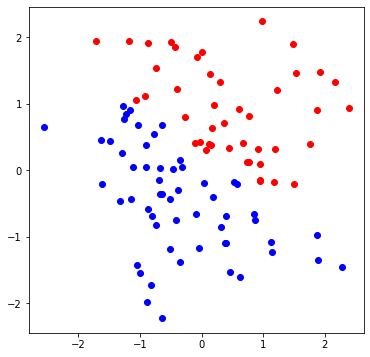

In [4]:
plt.figure(figsize=(6, 6)) 
plt.plot(X[T==1,0], X[T==1,1], 'o', color='red')
plt.plot(X[T==0,0], X[T==0,1], 'o', color='blue')
plt.show()

In [16]:
np.random.seed() # 乱数を初期化
w = np.random.randn(3)  # パラメータをランダムに初期化

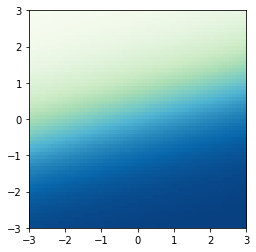

In [17]:
# 散布図と予測分布を描画
# 図を描くための準備
seq = np.arange(-3, 3, 0.1)
xlist, ylist = np.meshgrid(seq, seq)
zlist = [sigmoid(np.inner(w, phi(x, y))) for x, y in zip(xlist, ylist)]
plt.imshow(zlist, extent=[-3,3,-3,3], origin='lower', cmap='GnBu')
plt.show()

In [7]:
np.inner(w,phi(2,2))

-0.22917665646437735

In [8]:
# 学習率の初期値
eta = 0.1


for i in range(len(xlist)):
    list = range(N)
    
    for n in list:
        x_n, y_n = X[n, :]
        t_n = T[n]

        # 予測確率
        feature = phi(x_n, y_n)
        predict = sigmoid(np.inner(w, feature))
        w -= eta * (predict - t_n) * feature

    # イテレーションごとに学習率を小さくする
    eta *= 0.9

In [9]:
# 図を描くための準備
seq = np.arange(-3, 3, 0.1)
xlist, ylist = np.meshgrid(seq, seq)
zlist = [sigmoid(np.inner(w, phi(x, y))) for x, y in zip(xlist, ylist)]

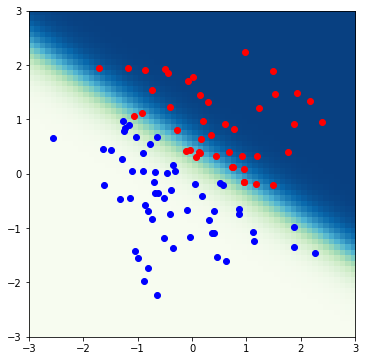

In [15]:
# 散布図と予測分布を描画
plt.figure(figsize=(6, 6)) 
plt.imshow(zlist, extent=[-3,3,-3,3], origin='lower', cmap='GnBu')
plt.plot(X[T==1,0], X[T==1,1], 'o', color='red')
plt.plot(X[T==0,0], X[T==0,1], 'o', color='blue')
plt.show()

In [11]:
len(zlist)

60

In [12]:
X[T==0,0]

array([ 1.86755799,  0.3130677 , -2.55298982,  0.8644362 ,  2.26975462,
        0.04575852, -0.88778575, -0.34791215, -0.38732682, -1.04855297,
       -0.50965218, -1.25279536, -1.61389785, -0.89546656, -0.51080514,
       -0.63432209, -0.67246045, -0.81314628,  0.17742614, -1.63019835,
       -0.90729836,  1.13940068,  0.40234164, -0.87079715, -0.31155253,
       -1.16514984,  0.46566244,  1.8831507 , -1.270485  , -0.41361898,
        0.37642553, -0.69456786, -0.76991607, -0.67433266, -0.63584608,
        0.57659082,  0.39600671, -1.49125759, -1.31590741, -0.74475482,
       -0.09845252,  1.12663592, -1.14746865, -1.22543552, -1.00021535,
        0.85683061, -1.03424284, -0.80340966, -0.4555325 , -0.35399391,
       -0.6436184 ,  0.62523145, -1.10438334, -1.29285691, -0.03928282,
        0.52327666])